# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previous numerical exercise.

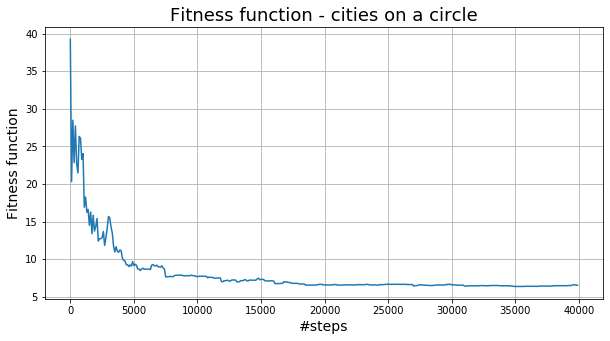

Results - cities on a circle
Total distance travelled: 6.12405


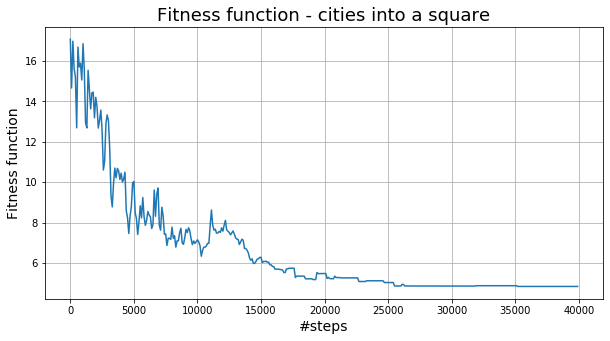

Results - cities in a square
Total distance travelled: 4.74011


In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

data_fitness = np.loadtxt("10.1/results.circ.fitness")

plt.figure(figsize=(10,5))
plt.plot(data_fitness[:400,0], data_fitness[:400,1])
plt.title("Fitness function - cities on a circle",fontsize=18)
plt.xlabel("#steps",fontsize=14)
plt.ylabel("Fitness function",fontsize=14)
plt.grid(True);
plt.show();

print("Results - cities on a circle")
print("Total distance travelled:", data_fitness[-1,1])

data_fitness = np.loadtxt("10.1/results.square.fitness")

plt.figure(figsize=(10,5))
plt.plot(data_fitness[:400,0], data_fitness[:400,1])
plt.title("Fitness function - cities into a square",fontsize=18)
plt.xlabel("#steps",fontsize=14)
plt.ylabel("Fitness function",fontsize=14)
plt.grid(True);
plt.show();

print("Results - cities in a square")
print("Total distance travelled:", data_fitness[-1,1])

**Warning**: The previous graphs show only the first 40000 steps.

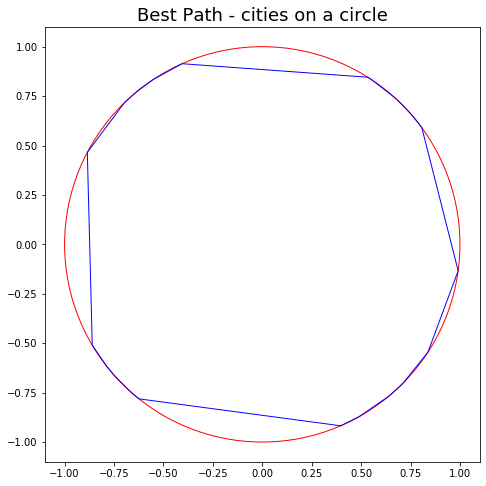

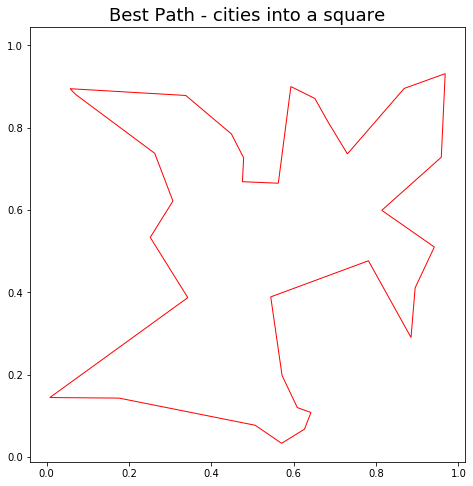

In [5]:
from matplotlib.path import Path
import matplotlib.patches as patches

data_path = np.loadtxt("10.1/results.circ.path")

path = matplotlib.path.Path(data_path)
fig, ax = plt.subplots(figsize =(8,8))
patch = patches.PathPatch(path, facecolor = 'None', edgecolor = "blue", alpha = 5)
patch2 = patches.Circle((0,0), radius=1, fc = "None", ec = "red")
ax.add_patch(patch2)
ax.add_patch(patch)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_title("Best Path - cities on a circle",fontsize=18)
plt.axis('square')
plt.show()

data_path = np.loadtxt("10.1/results.square.path")

path = matplotlib.path.Path(data_path)
fig, ax = plt.subplots(figsize =(8,8))
patch = patches.PathPatch(path, facecolor = 'None', edgecolor = "red")
ax.add_patch(patch)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title("Best Path - cities into a square",fontsize=18)
plt.axis('square')
plt.show()

I have done some simulation with different random seeds, finding different results, this is the lowest one for each path.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

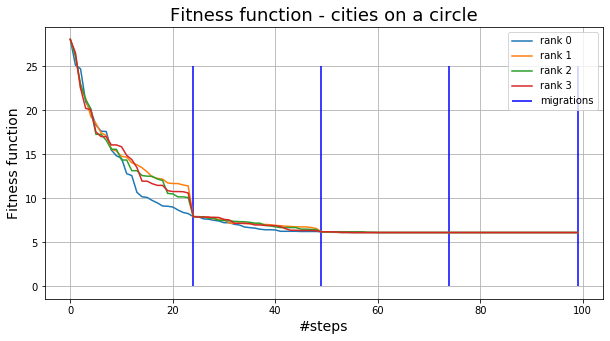

Results - cities on a circle
Total distance travelled: 6.12405


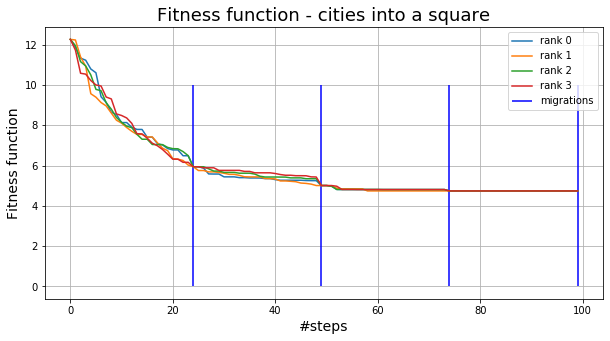

Results - cities into a square
Total distance travelled: 4.74011


In [14]:
data0 = np.loadtxt("10.2/results/results.circ.min.0")
data1 = np.loadtxt("10.2/results/results.circ.min.1")
data2 = np.loadtxt("10.2/results/results.circ.min.2")
data3 = np.loadtxt("10.2/results/results.circ.min.3")

plt.figure(figsize=(10,5))
plt.plot(data0[0:100,0], data0[0:100,1], label = 'rank 0')
plt.plot(data1[0:100,0], data1[0:100,1], label = 'rank 1')
plt.plot(data2[0:100,0], data2[0:100,1], label = 'rank 2')
plt.plot(data3[0:100,0], data3[0:100,1], label = 'rank 3')
plt.title("Fitness function - cities on a circle", fontsize=18)
plt.vlines(np.array([24,49,74,99]),0,25, color ='b', label ='migrations')
plt.xlabel("#steps", fontsize=14)
plt.ylabel("Fitness function", fontsize=14)
plt.grid(True);
plt.legend()
plt.show();

print("Results - cities on a circle")
print("Total distance travelled:", data0[-1,1])

data0 = np.loadtxt("10.2/results/results.square.min.0")
data1 = np.loadtxt("10.2/results/results.square.min.1")
data2 = np.loadtxt("10.2/results/results.square.min.2")
data3 = np.loadtxt("10.2/results/results.square.min.3")

plt.figure(figsize=(10,5))
plt.plot(data0[0:100,0], data0[0:100,1], label = 'rank 0')
plt.plot(data1[0:100,0], data1[0:100,1], label = 'rank 1')
plt.plot(data2[0:100,0], data2[0:100,1], label = 'rank 2')
plt.plot(data3[0:100,0], data3[0:100,1], label = 'rank 3')
plt.title("Fitness function - cities into a square", fontsize=18)
plt.vlines(np.array([24,49,74,99]),0,10, color ='b', label ='migrations')
plt.xlabel("#steps", fontsize=14)
plt.ylabel("Fitness function", fontsize=14)
plt.grid(True);
plt.legend()
plt.show();

print("Results - cities into a square")
print("Total distance travelled:", data0[-1,1])

I decided every $25$ steps to make a migration, that is a broadcast call where every continent share its best individual. The four best individuals (one for each continent) replace the four best individuals in each continent. It takes fewer steps to converge compared to the non parallelized genetic algorithm.